## Librerías

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
from PIL import Image

## Data

In [3]:
train = pd.read_csv("data/train.csv")

In [4]:
df = train.copy()

## Data exploration

In [70]:
df.head(15)

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.77,68,1,0.69,2178.00,12,0,1,0,0.00
1,95356,0,0.29,52,0,0.39,3750.00,16,0,1,0,1.00
2,108917,0,0.00,54,0,0.35,6833.00,8,0,1,0,0.00
3,99039,0,0.05,66,1,0.41,5200.00,6,0,1,0,1.00
4,116168,0,0.17,45,0,4702.00,5400.00,10,0,3,0,1.00
5,80810,0,0.05,73,0,0.01,3000.00,4,0,0,0,0.00
6,93155,0,0.06,45,0,2501.00,5400.00,12,0,1,0,2.00
7,91255,0,1.00,63,0,0.41,3800.00,7,0,1,0,0.00
8,72678,1,0.06,56,3,0.67,4658.00,16,0,3,0,0.00
9,92911,0,0.91,44,1,0.45,7716.00,9,0,2,0,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [7]:
df.isnull().sum()

Id                                          0
target                                      0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           14567
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       1942
dtype: int64

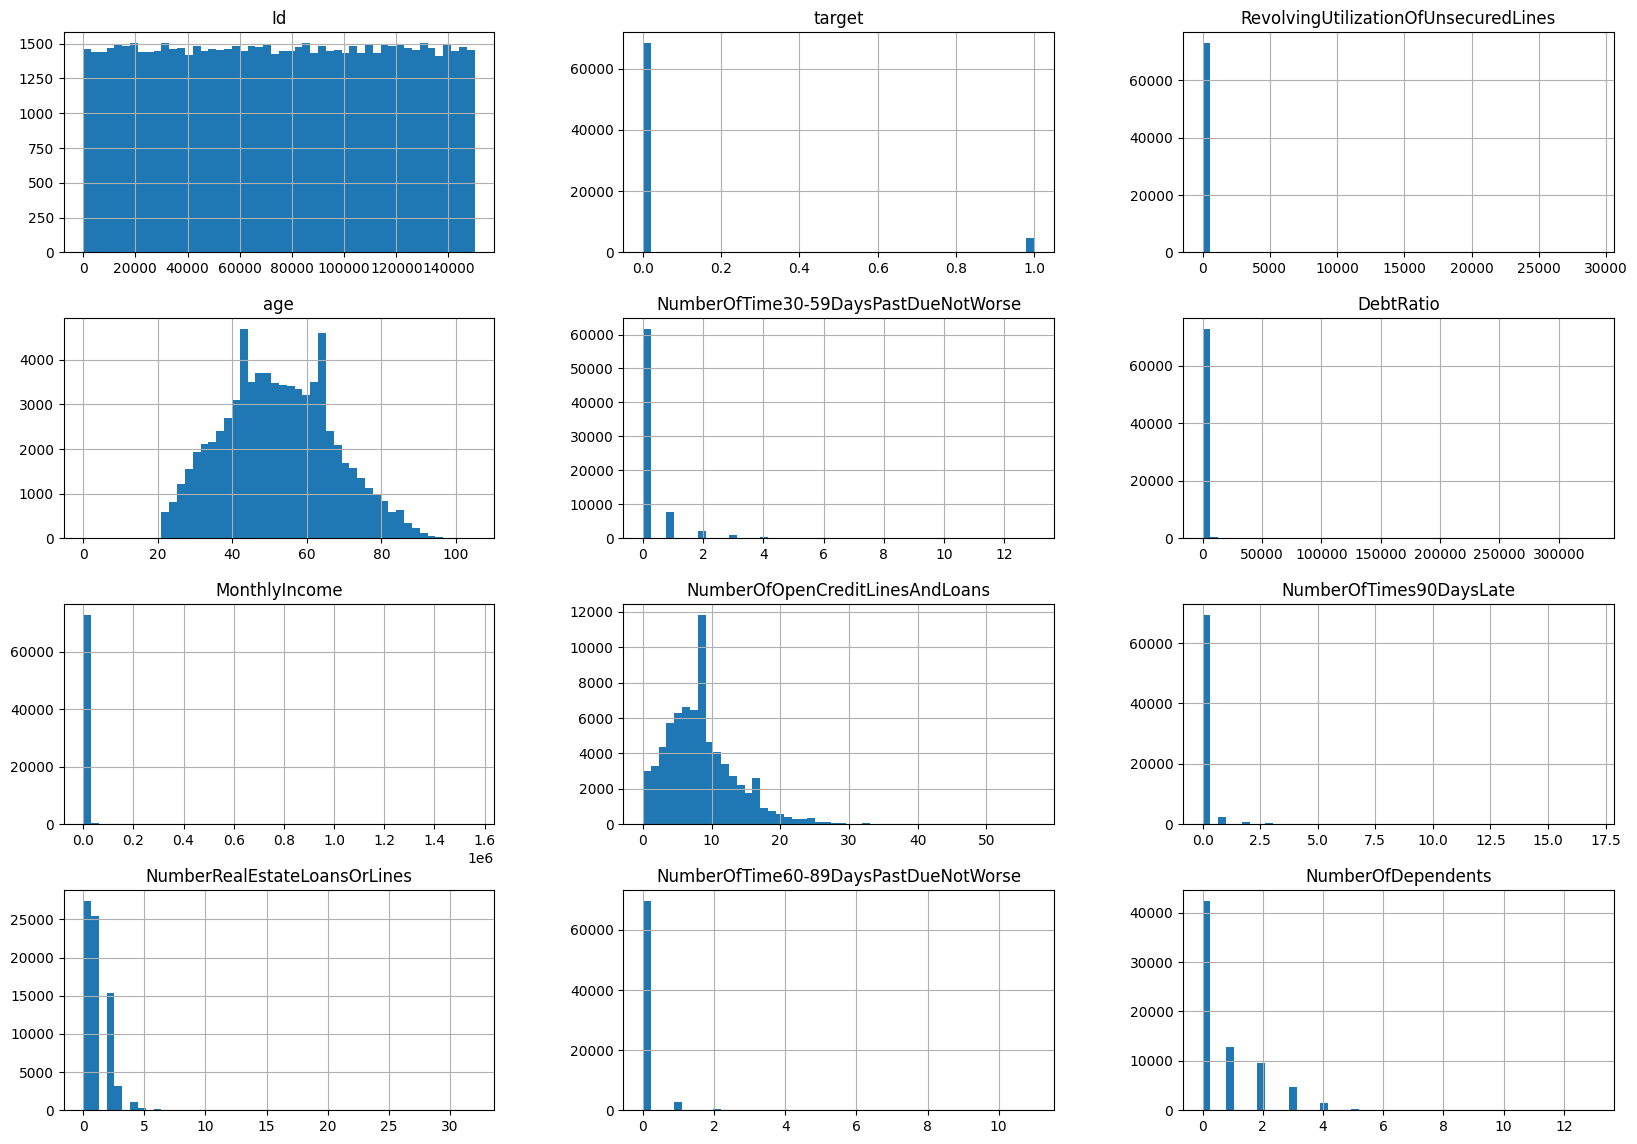

In [86]:
df.hist(bins=50, figsize=(20,14))
plt.show()

## Data Processing

### Correlación entre variables 

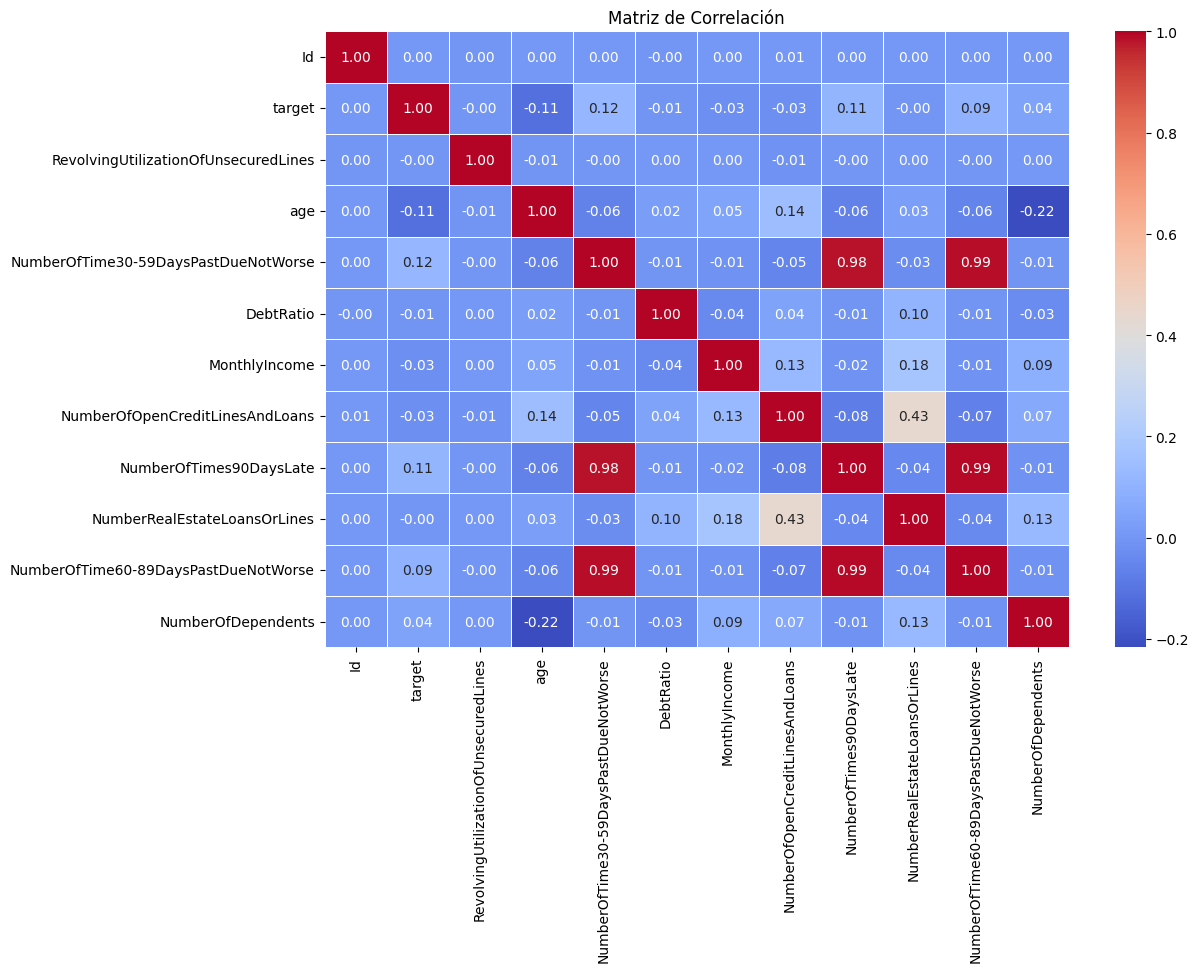

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Observación columnas

In [8]:
df['target'].value_counts()

target
0    68527
1     4836
Name: count, dtype: int64

In [16]:
df['RevolvingUtilizationOfUnsecuredLines'].unique()

array([0.76821913, 0.28987314, 0.        , ..., 0.55052682, 0.67865064,
       0.13669894])

## Limpieza

### Columna 'target'

In [22]:
# DATOS DESBALANCEADOS. VER QUE HACER 

### Columna 'RevolvingUtilizationOfUnsecuredLines'

Análisis de distribución de datos

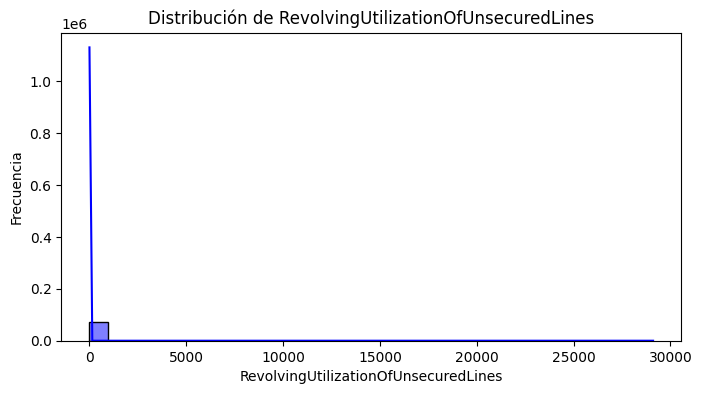

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['RevolvingUtilizationOfUnsecuredLines'], bins=30, kde=True, color='blue')
plt.title('Distribución de RevolvingUtilizationOfUnsecuredLines')
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')
plt.ylabel('Frecuencia')
plt.show()

### Columna 'age'

In [10]:
df['age'].unique()

array(['68y', '52y', '54y', '66y', '45y', '73y', '63y', '56y', '44y',
       '70y', '48y', '40y', '39y', '59y', '29y', '50y', '49y', '71y',
       '53y', '43y', '51y', '57y', '65y', '60y', '47y', '74y', '46y',
       '30y', '32y', '22y', '37y', '25y', '28y', '42y', '75y', '77y',
       '55y', '36y', '72y', '79y', '61y', '76y', '82y', '67y', '83y',
       '88y', '80y', '78y', '38y', '26y', '64y', '81y', '33y', '34y',
       '58y', '69y', '41y', '62y', '27y', '86y', '24y', '35y', '90y',
       '84y', '23y', '91y', '31y', '89y', '93y', '99y', '85y', '87y',
       '21y', '94y', '96y', '98y', '92y', '105y', '103y', '102y', '97y',
       '95y', '0y', '101y'], dtype=object)

In [11]:
df['age'] = df['age'].str.replace('y', '').astype(int)

### Columna 'NumberOfTime30-59DaysPastDueNotWorse'

In [23]:
df['NumberOfTime30-59DaysPastDueNotWorse'].unique()

array([ 1,  0,  3,  6,  2, 98,  4,  7,  5,  8, 96,  9, 13, 10, 12],
      dtype=int64)

In [25]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     61695
1      7795
2      2259
3       859
4       364
5       156
98      124
6        63
7        31
8         8
9         4
12        2
96        1
13        1
10        1
Name: count, dtype: int64

La columna 'NumberOfTime30-59DaysPastDueNotWorse' parece representar el número de veces que una persona ha estado 30-59 días atrasada en el pago de una deuda en el pasado, sin que la situación haya empeorado desde entonces. 

Algunas observaciones son:
- La mayoría de las personas (61,695) no han estado atrasadas en el pago durante este período específico.
- Un número significativo de personas ha estado atrasado una vez (7,795) o dos veces (2,259).

**Valores atípicos**: 
En mi opinión hay valores atípicos, que serían 96 y 98, por lo que procederé a eliminarlos.

In [26]:
# Eliminar filas con valores '96' y '98' en la columna 'NumberOfTime30-59DaysPastDueNotWorse'
df.drop(df[(df['NumberOfTime30-59DaysPastDueNotWorse'] == 96) | (df['NumberOfTime30-59DaysPastDueNotWorse'] == 98)].index, inplace=True)

# Verificar que las filas con valores '96' y '98' hayan sido eliminadas
print(df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts())


NumberOfTime30-59DaysPastDueNotWorse
0     61695
1      7795
2      2259
3       859
4       364
5       156
6        63
7        31
8         8
9         4
12        2
13        1
10        1
Name: count, dtype: int64


### Columna 'DebtRatio'

In [29]:
df['DebtRatio'].value_counts()

DebtRatio
0.000000    1990
1.000000     126
4.000000      87
2.000000      80
5.000000      72
            ... 
0.236910       1
0.254976       1
0.289958       1
0.204740       1
0.179301       1
Name: count, Length: 59266, dtype: int64

In [39]:
df[['DebtRatio']].describe()

,DebtRatio
count,73238.000000
mean,360.359892
std,2479.717843
min,0.000000
25%,0.174294
50%,0.366336
75%,0.864767
max,329664.000000


In [36]:
df[df['DebtRatio'] > 5.0]

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
4,116168,0,0.168771,45,0,4702.0,NaN,10,0,3,0,1.0
6,93155,0,0.061963,45,0,2501.0,NaN,12,0,1,0,2.0
10,11619,0,0.397704,70,1,3012.0,NaN,12,0,1,0,0.0
18,123018,0,0.102411,71,0,309.0,NaN,11,0,0,0,1.0
22,135254,0,0.000000,57,0,1346.0,0.0,8,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73338,115028,0,0.058807,55,0,1243.0,NaN,12,0,1,0,0.0
73346,98362,0,0.000000,56,0,400.0,NaN,8,0,0,0,0.0
73349,63706,0,0.021210,73,0,59.0,NaN,10,0,0,0,0.0
73351,134624,0,0.073159,79,0,68.0,NaN,1,0,0,0,NaN


### Columna 'MonthlyIncome' - NULOS = 14508

In [32]:
df['MonthlyIncome'].isna().sum()

14508

In [53]:
df['MonthlyIncome'].value_counts()

MonthlyIncome
5000.0     1346
4000.0     1024
6000.0      943
3000.0      839
0.0         781
           ... 
2199.0        1
735.0         1
16725.0       1
14373.0       1
8940.0        1
Name: count, Length: 10560, dtype: int64

In [61]:
pd.options.display.float_format = '{:.2f}'.format

# Ahora, al mostrar los estadísticos descriptivos, los números se mostrarán en formato estándar
print(df['MonthlyIncome'].describe())

count     58730.00
mean       6653.50
std       10465.98
min           0.00
25%        3400.00
50%        5400.00
75%        8300.00
max     1560100.00
Name: MonthlyIncome, dtype: float64


In [62]:
df['MonthlyIncome'].median()

5400.0

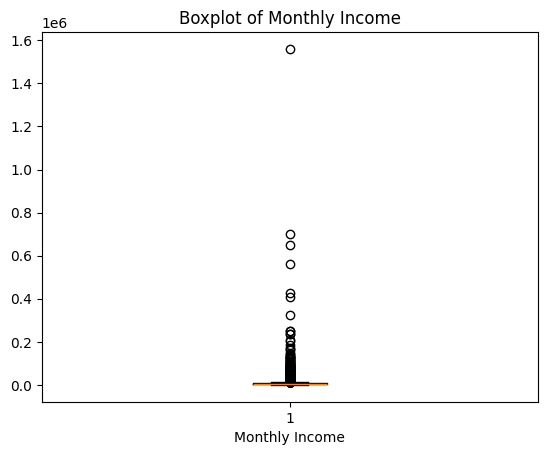

In [57]:
plt.boxplot(df['MonthlyIncome'].dropna())
plt.xlabel('Monthly Income')
plt.title('Boxplot of Monthly Income')
plt.show()

In [63]:
# Imputar la mediana a los valores faltantes en la columna 'MonthlyIncome'

df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

### Columna 'NumberOfOpenCreditLinesAndLoans'

In [65]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count   73238.00
mean        8.46
std         5.13
min         0.00
25%         5.00
50%         8.00
75%        11.00
max        57.00
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

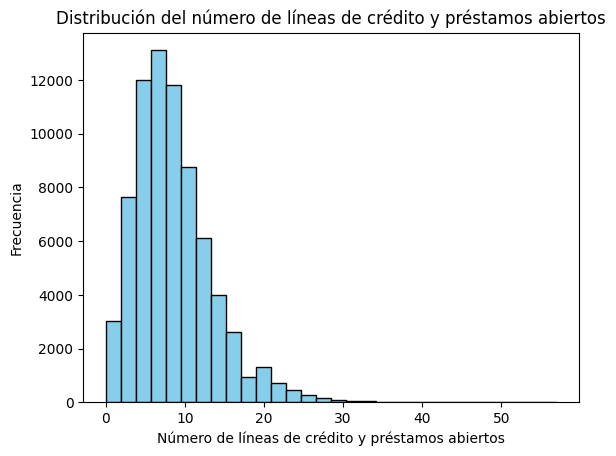

In [69]:
plt.hist(df['NumberOfOpenCreditLinesAndLoans'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Número de líneas de crédito y préstamos abiertos')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de líneas de crédito y préstamos abiertos')
plt.show()

### Columna 'NumberOfTimes90DaysLate'

In [74]:
df['NumberOfTimes90DaysLate'].describe()

count   73238.00
mean        0.09
std         0.49
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        17.00
Name: NumberOfTimes90DaysLate, dtype: float64

In [76]:
# Calcular el percentil 75
percentile_75 = df['NumberOfTimes90DaysLate'].quantile(0.75)

# Contar cuántos valores son mayores que el percentil 75
count_above_75 = (df['NumberOfTimes90DaysLate'] > percentile_75).sum()

print("Número de valores mayores que el percentil 75:", count_above_75)


Número de valores mayores que el percentil 75: 3896


In [77]:
values_above_75 = df[df['NumberOfTimes90DaysLate'] > percentile_75]['NumberOfTimes90DaysLate']
print("Valores mayores que el percentil 75:", values_above_75)


Valores mayores que el percentil 75: 19       2
26       1
31       1
42       1
47       1
        ..
73268    1
73282    1
73316    1
73328    4
73340    3
Name: NumberOfTimes90DaysLate, Length: 3896, dtype: int64


### 'NumberRealEstateLoansOrLines'

In [78]:
df[['NumberRealEstateLoansOrLines']].describe()

,NumberRealEstateLoansOrLines
count,73238.00
mean,1.02
std,1.14
min,0.00
25%,0.00
50%,1.00
75%,2.00
max,32.00


Para la columna 'NumberRealEstateLoansOrLines', los estadísticos descriptivos muestran que la mayoría de las personas tienen entre 0 y 2 préstamos o líneas de crédito respaldadas por bienes raíces, ya que el 75% de los valores están en ese rango. Sin embargo, el valor máximo es 32, lo que puede indicar la presencia de valores atípicos o errores en los datos.

### Columna 'NumberOfTime60-89DaysPastDueNotWorse'

In [81]:
df[['NumberOfTime60-89DaysPastDueNotWorse']].describe()

,NumberOfTime60-89DaysPastDueNotWorse
count,73238.00
mean,0.07
std,0.33
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,11.00


### Columna 'NumberOfDependents'

In [83]:
df[['NumberOfDependents']].describe()

,NumberOfDependents
count,71308.00
mean,0.76
std,1.11
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,13.00


In [91]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.00     42419
1.00     12901
2.00      9471
3.00      4613
4.00      1441
5.00       352
6.00        74
7.00        26
8.00         7
9.00         3
13.00        1
Name: count, dtype: int64

In [92]:
df[df['NumberOfDependents'] == 13.00]

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
68297,128034,0,1.00,53,1,0.23,3333.00,3,1,1,0,13.00


In [93]:
df.drop(index=68297, inplace=True)

In [96]:
df.fillna(0, inplace=True)

In [97]:
df.isnull().sum()

Id                                      0
target                                  0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Guardar nuevo DF luego limpieza

In [98]:
df.to_csv('./data/train_limpio.csv')